In [92]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import statistics
import os
import seaborn as sns


In [93]:
data_processed_dir = os.path.join('.', 'processed')
processed_csv = data_processed_dir + '/processed.csv'
timestamp_form = '%Y-%m-%d %H:%M:%S.%f'

In [94]:
gpu_event_data = pd.read_csv(processed_csv, index_col=0)
gpu_stats_labels = ['Power (W)','Temperature (C)','GPU Util.(%)','Memory Util.(%)']
median_label = ['Below/Equal to Median', 'Above Median']

In [95]:
def timestr_cov(date_string):
     if '.' not in date_string:
        date_string = date_string + '.0'
     return(date_string)
gpu_event_data['start_time'] = gpu_event_data['start_time'].apply(
    lambda x: (timestr_cov(x)))
gpu_event_data['stop_time'] = gpu_event_data['stop_time'].apply(
    lambda x: (timestr_cov(x)))
gpu_event_data['start_time'] = gpu_event_data['start_time'].apply(
    lambda x: (datetime.strptime(x, timestamp_form)))
gpu_event_data['stop_time'] = gpu_event_data['stop_time'].apply(
    lambda x: (datetime.strptime(x, timestamp_form)))

In [96]:
gpu_event_data.head()

,hostname,eventName,x,y,level,powerDrawWatt,gpuTempC,gpuUtilPerc,gpuMemUtilPerc,start_time,stop_time,gpuUUID
0,0d56a730076643d585f77e00d2d8521a00000Q,TotalRender,156,186,12,96.807273,37.590909,70.318182,37.863636,2018-11-08 08:27:10.606,2018-11-08 08:27:54.895,GPU-d84a1024-9381-c725-3b85-dd7143e64c35
1,0d56a730076643d585f77e00d2d8521a00000Q,Render,156,186,12,96.807273,37.590909,70.318182,37.863636,2018-11-08 08:27:10.608,2018-11-08 08:27:53.796,GPU-d84a1024-9381-c725-3b85-dd7143e64c35
2,83ea61ac1ef54f27a3bf7bd0f41ecaa700000J,Uploading,200,23,12,42.440000,41.000000,0.000000,0.000000,2018-11-08 08:27:10.839,2018-11-08 08:27:11.893,GPU-8792a29c-529e-1837-1806-c669cd9b1960
3,83ea61ac1ef54f27a3bf7bd0f41ecaa700000J,Tiling,200,23,12,42.440000,41.000000,0.000000,0.000000,2018-11-08 08:27:10.846,2018-11-08 08:27:11.882,GPU-8792a29c-529e-1837-1806-c669cd9b1960
4,b9a1fa7ae2f74eb68f25f607980f97d700000H,TotalRender,160,14,12,91.566957,38.695652,71.000000,39.913043,2018-11-08 08:27:10.612,2018-11-08 08:27:56.265,GPU-38bbf3b6-80fb-7e6f-6678-ee45035507ab


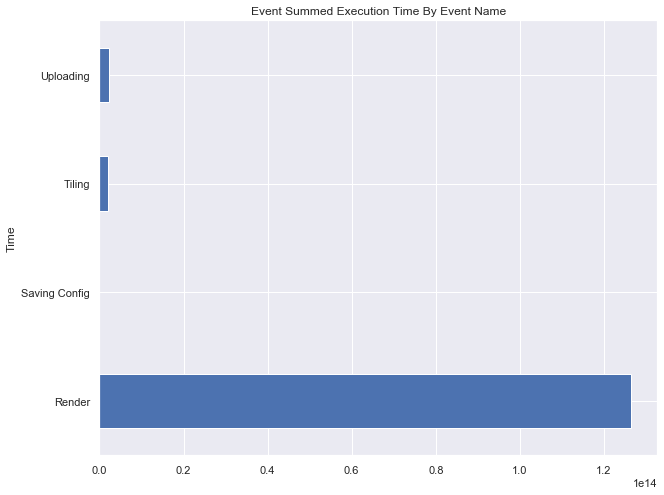

In [98]:
# group by event name (except total) to find execution times
event_deltas = gpu_event_data[gpu_event_data['eventName'] != 'TotalRender'].groupby(
    ['eventName']).apply(lambda x: x.stop_time - x.start_time)

# sum execution times
event_deltas.groupby(['eventName']).sum().plot(kind = 'barH')

plt.ylabel('Time')
plt.title('Event Summed Execution Time By Event Name')
plt.rcParams['figure.figsize'] = [10, 8]

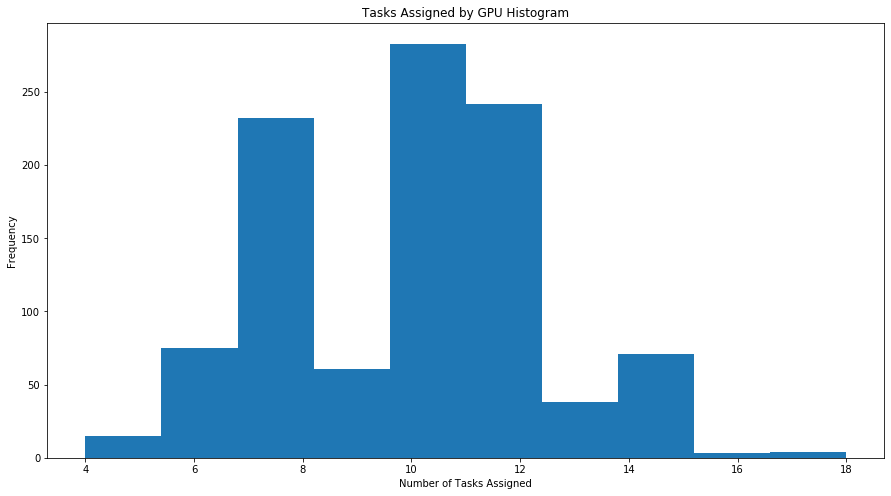

In [8]:
# plot host name frequency (.value_counts) using a histogram

gpu_event_data['hostname'].value_counts().plot(kind = 'hist')
plt.xlabel('Number of Tasks Assigned')
plt.title('Tasks Assigned by GPU Histogram')

plt.rcParams['figure.figsize'] = [5, 5]

plt.savefig('./tasks-histo.png') # save figure
plt.show()

In [9]:
gpu_data = pd.read_csv('./raw/gpu.csv')
gpu_data.sort_values('gpuTempC',ascending=False)
gpu_data_cor = gpu_data.corr()
gpu_data_cor.style.background_gradient()

,gpuSerial,powerDrawWatt,gpuTempC,gpuUtilPerc,gpuMemUtilPerc
gpuSerial,1,-0.0130078,-0.142388,0.00145148,0.0046463
powerDrawWatt,-0.0130078,1,0.537191,0.862673,0.870745
gpuTempC,-0.142388,0.537191,1,0.505906,0.492783
gpuUtilPerc,0.00145148,0.862673,0.505906,1,0.966571
gpuMemUtilPerc,0.0046463,0.870745,0.492783,0.966571,1


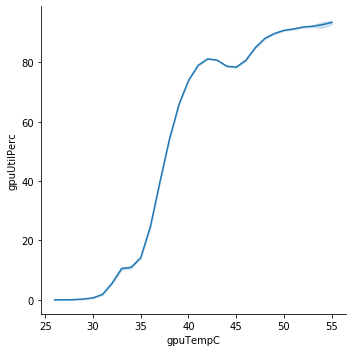

In [10]:
sns.relplot(x='gpuTempC',y='gpuUtilPerc',kind='line',data=gpu_data)

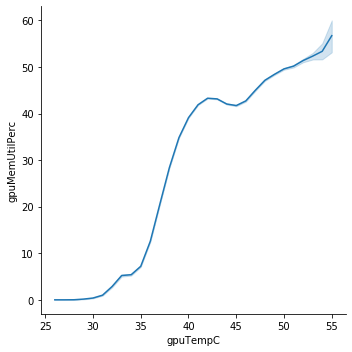

In [11]:
sns.relplot(x='gpuTempC',y='gpuMemUtilPerc',kind='line',data=gpu_data)

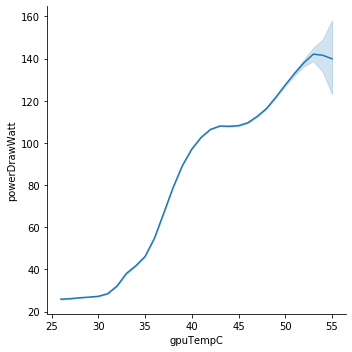

In [12]:
sns.relplot(x='gpuTempC',y='powerDrawWatt',kind='line',data=gpu_data)

In [116]:
duration_time=pd.to_datetime(gpu_event_data['stop_time']) - pd.to_datetime(gpu_event_data['start_time'])

In [117]:
gpu_event_data['render_time']= duration_time

In [118]:
d1=gpu_event_data[gpu_event_data['eventName'] == 'Render']

In [119]:
np.mean(d1['render_time'])

Timedelta('0 days 00:00:41.597205')

In [109]:
np.mean(d1['powerDrawWatt'])

96.57628493756765

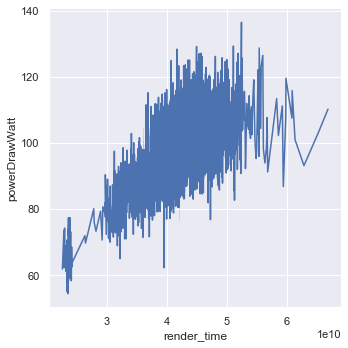

In [89]:
sns.relplot(x='render_time',y='powerDrawWatt',kind='line',data=d1)


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [126]:
Frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3039 entries, 1 to 8174
Data columns (total 3 columns):
x              3039 non-null int64
y              3039 non-null int64
render_time    3039 non-null timedelta64[ns]
dtypes: int64(2), timedelta64[ns](1)
memory usage: 95.0 KB
